In [1]:
%pip install pandas
%pip install numpy
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

graph_dat = pd.read_csv("data/age_run_1_00.csv")
graph_dat = graph_dat.filter(items=["t","age","value","vartype"])
D_dat = graph_dat[(graph_dat["vartype"] == "D")] 
N_dat= graph_dat[(graph_dat["vartype"] == "N")] 
S_dat= graph_dat[(graph_dat["vartype"] == "S")] 
X_dat= graph_dat[(graph_dat["vartype"] == "Xsi1")] 
N_dat = N_dat.rename({"value":"N"},axis="columns")
S_dat = S_dat.rename({"value":"S"},axis="columns")
X_dat = X_dat.rename({"value":"Xsi"},axis="columns")
N_dat = N_dat.drop(columns="vartype")
S_dat = S_dat.drop(columns="vartype")


Text(0.5, 1.0, 'Ageing, resetting age 0 to 10k')

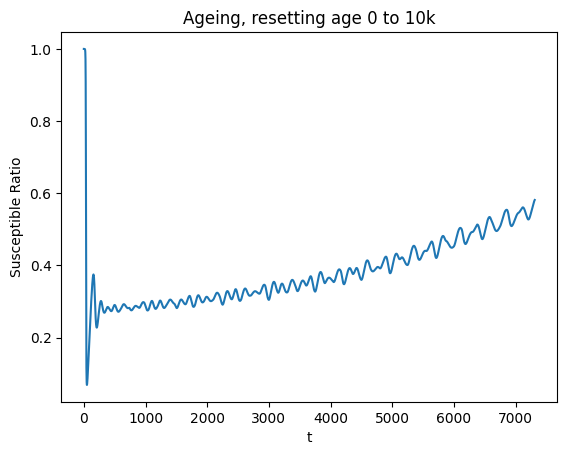

In [26]:
all_dat = N_dat.merge(S_dat,left_on=["t","age"],right_on=["t","age"])
total_dat = all_dat.groupby(["t"]).sum()
total_dat["Susceptible Ratio"] = total_dat["S"]/total_dat["N"]
sns.lineplot(data=total_dat,x="t",y="Susceptible Ratio")
plt.title("Ageing, resetting age 0 to 10k")

/tmp/ipykernel_4043348/1647118042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_dat["year"] = graph_dat["t"]/365.0


Text(0, 0.5, 'Rt')

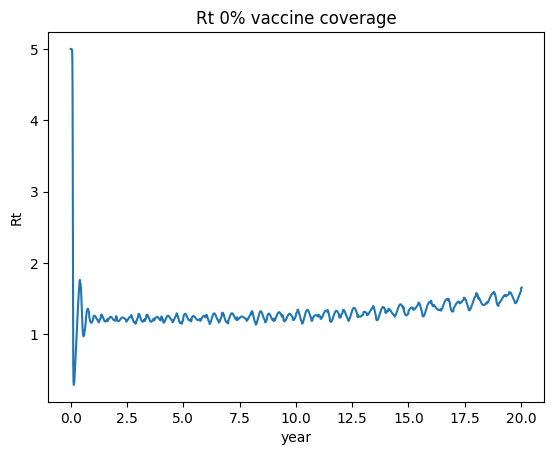

In [27]:
rt_dat= graph_dat[(graph_dat["vartype"] == "Rt")] 
rt_dat["year"] = graph_dat["t"]/365.0
sns.lineplot(data=rt_dat,x="year",y="value")
#plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.title("Rt 0% vaccine coverage")
plt.ylabel("Rt")
#plt.yscale('log')
#plt.ylim(0,5)

/tmp/ipykernel_4043348/4117133405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xsi_dat["year"] = graph_dat["t"]/365.0


          t  age     value vartype       year
8         0   90      52.0    Xsi1   0.000000
20        1   90      83.0    Xsi1   0.002740
32        2   90     106.0    Xsi1   0.005479
44        3   90     175.0    Xsi1   0.008219
56        4   90     270.0    Xsi1   0.010959
...     ...  ...       ...     ...        ...
87668  7305   90  548612.0    Xsi1  20.013699
87680  7306   90  553889.0    Xsi1  20.016438
87692  7307   90  557354.0    Xsi1  20.019178
87704  7308   90  563127.0    Xsi1  20.021918
87716  7309   90  567040.0    Xsi1  20.024658

[7310 rows x 5 columns]


(0.0, 2000000.0)

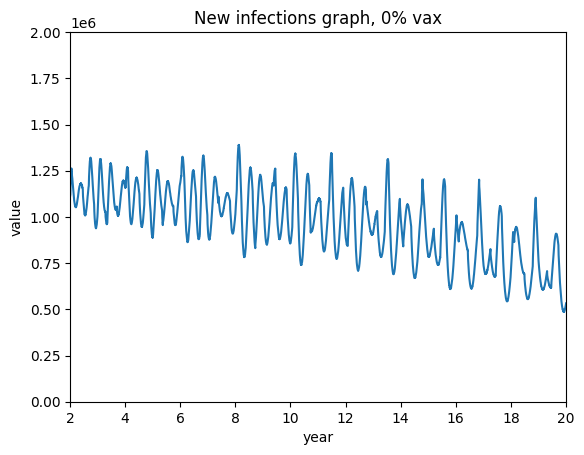

In [42]:
xsi_dat= graph_dat[(graph_dat["vartype"] == "Xsi1")] 
xsi_dat["year"] = graph_dat["t"]/365.0
print(xsi_dat)
sns.lineplot(data=xsi_dat,x="year",y="value")
#plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.title("New infections graph, 0% vax")
plt.xlim(2,20)
plt
plt.ylim([0,2000000])


In [ ]:
#N_dat = graph_dat[(graph_dat["vartype"] == "N")] 
N_dat["year"] = (D_dat["t"] % 20)
summed_vals = N_dat.groupby("t")["N"].sum()
print(summed_vals)
summed_vals = list(summed_vals)
plt.plot(summed_vals)
#sns.lineplot(data=summed_vals,x="t",y="value")
plt.title("Population graph, ageing 10K")

In [ ]:
D_dat = graph_dat[(graph_dat["vartype"] == "D")] 
D_dat["year"] = (D_dat["t"] % 20)
summed_vals = D_dat.groupby("year")["value"].sum()
summed_vals = list(summed_vals)
plt.plot(summed_vals)
#sns.lineplot(data=summed_vals,x="t",y="value")
plt.title("Natural Mortality graph, ageing 10K")

In [ ]:
all_dat = N_dat.merge(S_dat,left_on=["t","age"],right_on=["t","age"])
all_dat = all_dat[["t","age","S"]]
all_dat = all_dat[all_dat["age"] == 0]
all_dat["year_val"] = all_dat["t"] / 365
#total_dat["year_val"] = total_dat["t"] % 365
#total_dat["ratio"] = total_dat["S"]/total_dat["N"]
#total_dat["year"] = pd.Series(range(1,20*365))
#total_dat["year"] = total_dat["year"]/365 
#print(total_dat["year"])
print(all_dat)
ax = plt.axes()
sns.lineplot(data=all_dat,x="year_val",y="S")
plt.title("Age 0")
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

In [ ]:

all_dat = N_dat.merge(S_dat,left_on=["t","age"],right_on=["t","age"])
all_dat = all_dat[all_dat["age"] == 31]
total_dat = all_dat.groupby(["t"]).sum()
total_dat["ratio"] = total_dat["S"]/total_dat["N"]
sns.lineplot(data=total_dat,x="t",y="N")
plt.title("Age 31, resetting age 0 to 10K")

# t,age,value,vartype
# t,age,N,S

In [ ]:
all_dat = N_dat.merge(S_dat,left_on=["t","age"],right_on=["t","age"])
all_dat = all_dat[all_dat["age"] == 16]
total_dat = all_dat.groupby(["t"]).sum()
total_dat["ratio"] = total_dat["S"]/total_dat["N"]
sns.lineplot(data=total_dat,x="t",y="N")
plt.title("Age 16 Population Graph")


In [ ]:
total_dat.tail()

In [ ]:
# births being 1million per year
graph_dat = pd.read_csv("mod_birth.csv")
graph_dat = graph_dat.filter(items=["t","age","value","vartype"])
N_dat= graph_dat[(graph_dat["vartype"] == "N")] 
S_dat= graph_dat[(graph_dat["vartype"] == "S")] 
N_dat = N_dat.rename({"value":"N"},axis="columns")
S_dat = S_dat.rename({"value":"S"},axis="columns")
N_dat = N_dat.drop(columns="vartype")
S_dat = S_dat.drop(columns="vartype")
#
all_dat = N_dat.merge(S_dat,left_on=["t","age"],right_on=["t","age"])
total_dat = all_dat.groupby(["t","age"]).sum()
total_dat["ratio"] = total_dat["S"]/total_dat["N"]
sns.lineplot(data=total_dat,x="t",y="ratio")
plt.title("Ageing, resetting age 0 to 1 million")

# t,age,value,vartype
# t,age,N,S

In [ ]:
rt_dat= graph_dat[(graph_dat["vartype"] == "Rt")] 
sns.lineplot(data=rt_dat,x="t",y="value")
plt.title("Rt graph, ageing 1 million")

In [ ]:
D_dat = graph_dat[(graph_dat["vartype"] == "D")] 
D_dat["year"] = (D_dat["t"] % 20)
summed_vals = D_dat.groupby("year")["value"].sum()
print(summed_vals)
summed_vals = list(summed_vals)
plt.plot(summed_vals)
#sns.lineplot(data=summed_vals,x="t",y="value")
plt.title("Nondampeend Natural Mortality graph, ageing 1 mil")

In [ ]:
all_dat = N_dat.merge(S_dat,left_on=["t","age"],right_on=["t","age"])
all_dat = all_dat[all_dat["age"] == 0]
total_dat = all_dat.groupby(["t"]).sum()
total_dat["ratio"] = total_dat["S"]/total_dat["N"]
sns.lineplot(data=total_dat,x="t",y="ratio")
plt.title("Age 0, resetting age 0 to 1 million")

# t,age,value,vartype
# t,age,N,S

In [ ]:
all_dat = N_dat.merge(S_dat,left_on=["t","age"],right_on=["t","age"])
all_dat = all_dat[all_dat["age"] == 31]
total_dat = all_dat.groupby(["t"]).sum()
total_dat["ratio"] = total_dat["S"]/total_dat["N"]
sns.lineplot(data=total_dat,x="t",y="ratio")
plt.title("Age 31, resetting age 0 to 1 million")

In [ ]:
total_dat.tail()